<a href="https://colab.research.google.com/github/Ductrinh01/hand_tracking/blob/main/hand_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import numpy as np

In [2]:
x_data = np.zeros((600,250,250,3))
for i in range(600):
  x_data[i] = load_img('/content/drive/MyDrive/AI/image/'+str(i+27) +'.jpg', target_size=(250, 250))
  x_data[i] = img_to_array(x_data[i])
x_data /= 255
x_data.shape

(600, 250, 250, 3)

In [41]:
import pandas as pd
y_data = pd.read_csv('/content/drive/MyDrive/AI/data_resize.csv')
y_data.head(None)

,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
0,143.750000,179.166667,126.171875,164.583333,114.843750,143.750000,109.375000,124.479167,104.296875,109.375000,...,175.781250,67.708333,167.187500,131.770833,178.125000,118.229167,184.375000,109.895833,190.234375,102.083333
1,143.359375,179.166667,126.171875,164.583333,114.453125,143.750000,108.593750,125.000000,103.906250,110.416667,...,175.781250,68.750000,166.406250,131.770833,177.343750,118.750000,183.984375,110.937500,189.843750,102.604167
2,139.062500,182.291667,121.875000,168.750000,109.765625,147.395833,103.906250,128.125000,98.437500,113.541667,...,171.875000,69.791667,162.500000,134.375000,173.828125,121.354167,180.859375,113.020833,187.109375,104.166667
3,137.109375,184.375000,119.921875,170.312500,107.812500,148.958333,101.953125,129.687500,96.875000,115.625000,...,171.484375,70.833333,161.328125,135.937500,173.046875,122.395833,180.078125,114.062500,185.546875,105.729167
4,132.812500,192.187500,114.843750,178.125000,101.953125,156.770833,95.312500,137.500000,88.671875,123.437500,...,168.750000,75.000000,157.812500,142.708333,169.921875,128.645833,177.734375,120.312500,184.375000,110.937500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,128.906250,179.166667,111.328125,171.875000,97.656250,156.770833,88.671875,142.187500,80.859375,130.729167,...,142.578125,71.875000,141.796875,130.729167,150.781250,119.270833,157.421875,111.979167,162.890625,104.166667
596,129.296875,179.166667,111.718750,172.395833,98.437500,157.291667,89.062500,142.708333,80.859375,131.250000,...,142.968750,72.395833,141.796875,130.729167,150.781250,119.270833,157.421875,111.458333,163.281250,104.166667
597,129.687500,179.687500,112.109375,172.395833,98.437500,157.291667,89.062500,142.708333,81.250000,131.250000,...,142.968750,72.395833,142.187500,131.250000,151.171875,119.270833,157.421875,111.979167,163.281250,104.166667
598,131.640625,181.770833,114.843750,176.041667,101.562500,160.937500,92.187500,146.354167,84.375000,135.937500,...,142.968750,74.479167,142.578125,132.812500,151.562500,120.833333,157.421875,113.020833,162.890625,105.208333


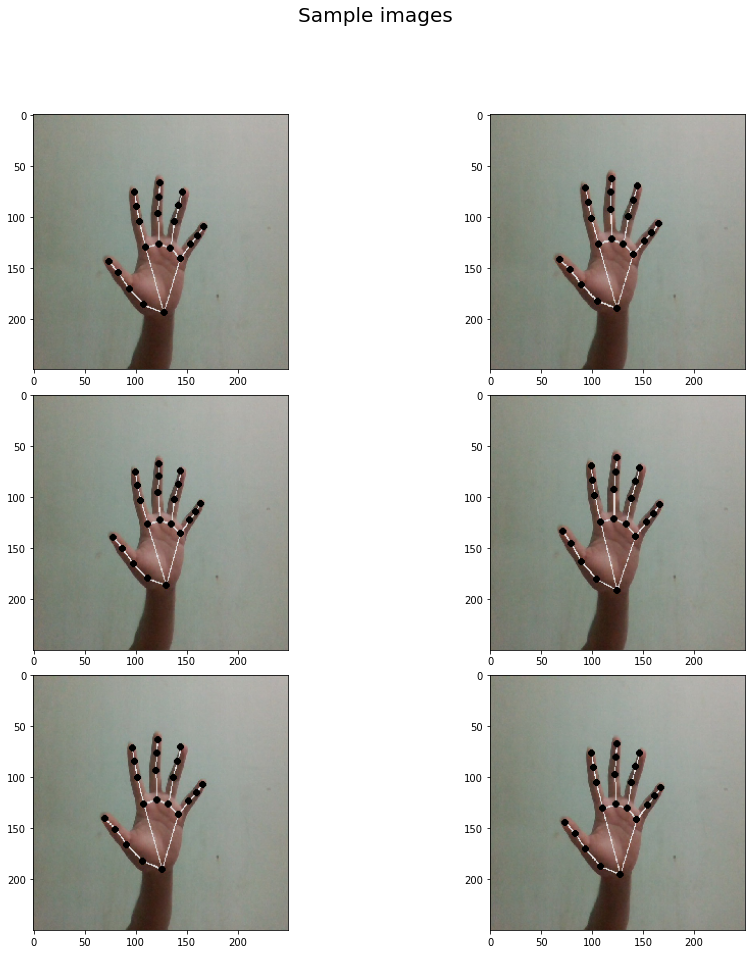

In [42]:
import matplotlib.pylab as plt
import pandas as pd
import random
import cv2
#n = x_data.shape[0]
plt.figure(figsize = (15, 15))
plt.subplots_adjust(hspace = .1)
for i in range(6):
    plt.subplot(3, 2, i + 1)
    k = random.randint(0, 499)
    img = x_data[k]
    points = list(y_data.iloc[k])
    points = [tuple(points[i : i + 2]) for i in range(0, len(points), 2)]
    for x, y in points:
        cv2.circle(img, (int(x), int(y)), 2, (0, 0, 0), 2)
    plt.imshow(img,cmap='gray')
_ = plt.suptitle('Sample images', size = 20)

In [5]:
from sklearn.model_selection import train_test_split
import numpy as np
input_shape = x_data.shape[1:3]
y_data = np.array(y_data, dtype = 'float')
num_class = y_data.shape[1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1)
print('Input shape: ', input_shape)
print('Number of output: ', num_class)
print('x train shape: ', x_train.shape)
print('y train shape: ', y_train.shape)
print('x test shape: ', x_test.shape)
print('y test shape: ', y_test.shape)

Input shape:  (250, 250)
Number of output:  42
x train shape:  (540, 250, 250, 3)
y train shape:  (540, 42)
x test shape:  (60, 250, 250, 3)
y test shape:  (60, 42)


In [27]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten, LeakyReLU, Convolution2D, MaxPool2D

model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(250,250,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_class))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 250, 250, 32)      864       
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 250, 250, 32)      0         
                                                                 
 batch_normalization_20 (Bat  (None, 250, 250, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 250, 250, 32)      9216      
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 250, 250, 32)      0         
                                                                 
 batch_normalization_21 (Bat  (None, 250, 250, 32)     128       
 chNormalization)                                     

In [28]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
model.compile(optimizer = 'Adam',loss = "mean_squared_error",metrics = ['mae'])
#model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = 'val_mae', patience = 25)
hist = model.fit(x_train, y_train, epochs = 50, batch_size = 16, validation_split = 0.1).history

Epoch 1/50
31/31 [==============================] - 5s 131ms/step - loss: 1694.3334 - mae: 27.3443 - val_loss: 16100.7080 - val_mae: 121.0310
Epoch 2/50
31/31 [==============================] - 4s 116ms/step - loss: 188.8202 - mae: 10.9005 - val_loss: 15420.1650 - val_mae: 119.4713
Epoch 3/50
31/31 [==============================] - 4s 115ms/step - loss: 143.8026 - mae: 9.5240 - val_loss: 14771.9541 - val_mae: 117.3888
Epoch 4/50
31/31 [==============================] - 4s 116ms/step - loss: 121.2836 - mae: 8.7318 - val_loss: 13194.2197 - val_mae: 110.7775
Epoch 5/50
31/31 [==============================] - 4s 119ms/step - loss: 123.8322 - mae: 8.8459 - val_loss: 11745.9961 - val_mae: 104.3577
Epoch 6/50
31/31 [==============================] - 4s 117ms/step - loss: 105.8386 - mae: 8.1622 - val_loss: 10488.0264 - val_mae: 98.4356
Epoch 7/50
31/31 [==============================] - 4s 119ms/step - loss: 93.7730 - mae: 7.7029 - val_loss: 9492.5518 - val_mae: 93.5139
Epoch 8/50
31/31 [===

In [30]:
val_loss, val_mae = model.evaluate(x_test, y_test)
print('val loss: {:.4f}'.format(val_loss))
print('val accuracy: {:.4f}'.format(val_mae))

2/2 [==============================] - 0s 65ms/step - loss: 210228.8594 - mae: 75.9573
val loss: 210228.8594
val accuracy: 75.9573


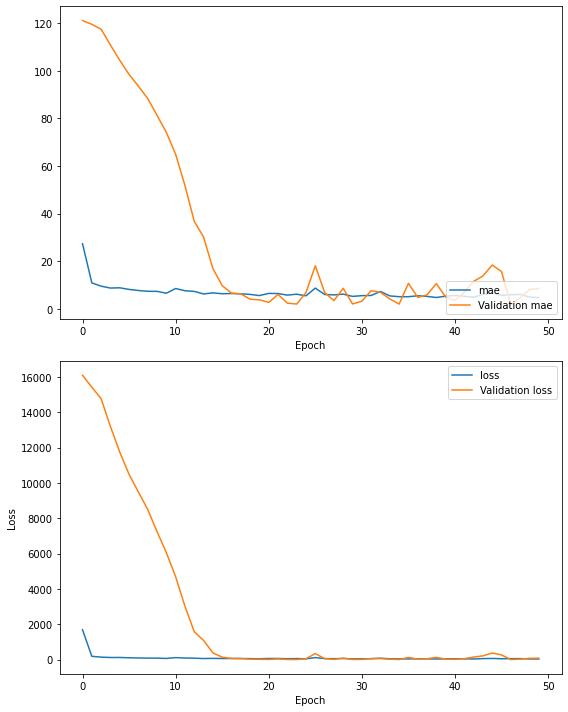

In [31]:
import pandas as pd
import matplotlib.pylab as plt
model_history = pd.DataFrame(hist)
# add epoch column
model_history['epoch'] = np.arange(1, len(model_history) + 1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
epochs = model_history.shape[0]
ax1.plot(np.arange(0, epochs), model_history['mae'], label = 'mae')
ax1.plot(np.arange(0, epochs), model_history['val_mae'], label = 'Validation mae')
ax1.legend(loc = 'lower right')
ax1.set_xlabel('Epoch')
ax2.plot(np.arange(0, epochs), model_history['loss'], label = 'loss')
ax2.plot(np.arange(0, epochs), model_history['val_loss'], label = 'Validation loss')
ax2.legend(loc = 'upper right')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
plt.tight_layout()
plt.show()

In [32]:
PATH = '/content/drive/MyDrive/AI/'
MODEL_NAME = "Model_MAE" + str(round(val_mae)) + ".h5"
model.save(PATH + MODEL_NAME)
print(MODEL_NAME)

Model_MAE76.h5


In [33]:
from keras.models import load_model
#model = load_model(PATH + 'Model_MAE42.h5')
model = load_model(PATH + MODEL_NAME)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


32
[133.09944  195.5354   113.04854  187.27184   98.3612   171.8519
  87.676994 154.26721   78.41853  145.14752  113.501274 130.6506
 107.54236  106.66698  105.29989   90.65501  101.82778   77.56847
 127.096375 127.365204 126.23239   97.364456 127.228645  80.79426
 127.7744    68.7555   138.58014  131.31487  142.78236  104.84033
 145.95854   88.04131  150.08813   75.3281   148.91684  142.30498
 158.86584  128.48218  166.12285  119.02455  172.87598  110.1476  ]


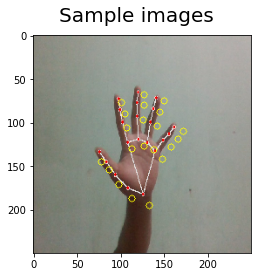

In [39]:
import matplotlib.pylab as plt
import cv2
pred = model.predict(x_test)
n = x_test.shape[0]

k = random.randint(0, 49)
print(k)
img = x_test[k].reshape(250,250,3)
points = pred[k,:]
#points = [tuple(points[i : i + 2]) for i in range(0, len(points), 2)]
print(points)
for j in range(21):
  cv2.circle(img, (int(points[j*2]), int(points[j*2+1])), 4, (255, 255, 0), 1)
plt.imshow(img)
_ = plt.suptitle('Sample images', size = 20)